# Keras, and Edge Detection
This notebook contains the work that was my introduction to keras. We used multiple keras neural networks on a character recognition tasks. We were given only perfect characters, and had to add noise to the data ourselves for training. We then create our own edge-detector using convolutions with a filter over the image.

In [1]:
# read in data
import numpy as np
data = np.genfromtxt('pattern1.txt', delimiter=' ')
print(data)

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  1. ...,  0.  0.  0.]
 [ 0.  1.  1. ...,  1.  1.  1.]
 [ 0.  1.  1. ...,  1.  1.  1.]]


In [2]:
# format data
newData = np.split(data, [12*i for i in range(1,26)])
letters = np.array(newData)
print(letters.shape)

(26, 12, 13)


In [3]:
# make a neural network
from keras import models, layers, optimizers, utils

inputs = layers.Input(shape=(156,))
x = layers.Dense(128, activation='relu')(inputs)
x = layers.Dense(128, activation='relu')(x)
outputs = layers.Dense(26, activation='softmax')(x)
model = models.Model(inputs=inputs, outputs=outputs)
model.compile(loss='categorical_crossentropy', 
              optimizer='Nadam',
              metrics=['accuracy'])

RuntimeError: module compiled against API version 0xc but this version of numpy is 0xb

RuntimeError: module compiled against API version 0xc but this version of numpy is 0xb

Using TensorFlow backend.


In [4]:
# get in data
x_train = letters.reshape(26, 156)
y_train = np.array(utils.to_categorical(
                range(26), num_classes=26))

In [5]:
mlp = model.fit(x_train, y_train, epochs=20)

Epoch 1/20
26/26 [==============================] - 0s 7ms/step - loss: 3.3646 - acc: 0.0385
Epoch 2/20
26/26 [==============================] - 0s 71us/step - loss: 3.0554 - acc: 0.1154
Epoch 3/20
26/26 [==============================] - 0s 63us/step - loss: 2.8264 - acc: 0.3462
Epoch 4/20
26/26 [==============================] - 0s 52us/step - loss: 2.6497 - acc: 0.5000
Epoch 5/20
26/26 [==============================] - 0s 55us/step - loss: 2.4799 - acc: 0.5769
Epoch 6/20
26/26 [==============================] - 0s 55us/step - loss: 2.2728 - acc: 0.7308
Epoch 7/20
26/26 [==============================] - 0s 85us/step - loss: 2.0674 - acc: 0.8462
Epoch 8/20
26/26 [==============================] - 0s 90us/step - loss: 1.8565 - acc: 0.9231
Epoch 9/20
26/26 [==============================] - 0s 74us/step - loss: 1.6464 - acc: 0.9231
Epoch 10/20
26/26 [==============================] - 0s 62us/step - loss: 1.4303 - acc: 0.9615
Epoch 11/20
26/26 [==============================] - 0s 58us

In [6]:
import matplotlib.pyplot as plt

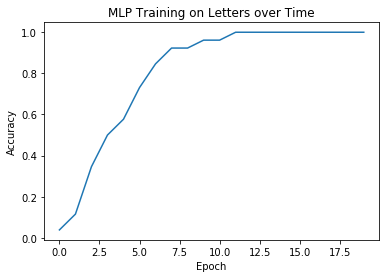

In [7]:
plt.plot(mlp.history['acc'])
plt.title('MLP Training on Letters over Time')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

The data contained no noise so the model fit in very few epochs, and is likely overfitting.

## Noise Generation

In [8]:
# types of noise to do
# 1) random bit flip
# 2) bleed 0's
# 3) bleed 1's
# 4) 0'd row/column
import random

noisyLetters = np.empty((0,12,13), dtype='int32')
noisyLettersLabels = np.empty((0,), dtype='int32')
lNum = -1 # number of letter
for oLetter in letters:
    lNum += 1
    """ Flip random bits in the letter matrix. """
    for i in range(10): # 10 random bit flip noises
        letter = np.copy(oLetter)
        for row in range(len(letter)):
            for col in range(len(letter[row])):
                if random.random() < 0.1:
                    letter[row][col] = int(not bool(letter[row][col]))
        noisyLetters = np.append(noisyLetters, [letter], axis=0)
        noisyLettersLabels = np.append(noisyLettersLabels, lNum)
        
    """ Each 0 has a small chance of turning all adjacent bits
    in to 0's (0 bleeding). This essentially makes the letter
    skinnier."""
    for i in range(5): # 5 random 0 bleeding
        letter = np.copy(oLetter)
        for row in range(len(letter)):
            for col in range(len(letter[row])):
                if random.random() < 0.2 and oLetter[row][col] == 0:
                    if row > 0:
                        letter[row-1][col] = 0
                    if row < 11:
                        letter[row+1][col] = 0
                    if col > 0:
                        letter[row][col-1] = 0
                    if col < 12:
                        letter[row][col+1] = 0
                    if row > 0 and col > 0:
                        letter[row-1][col-1] = 0
                    if row > 0 and col < 12:
                        letter[row-1][col+1] = 0
                    if row < 11 and col > 0:
                        letter[row+1][col-1] = 0
                    if row < 11 and col < 12:
                        letter[row+1][col+1] = 0
        noisyLetters = np.append(noisyLetters, [letter], axis=0)
        noisyLettersLabels = np.append(noisyLettersLabels, lNum)
        
    """ Each 1 has a small chance of turning all adjacent bits
    in to 1's (1 bleeding). This essentially makes the letter
    thiccer."""
    for i in range(5): # 5 random 1 bleeding
        letter = np.copy(oLetter)
        for row in range(len(letter)):
            for col in range(len(letter[row])):
                if random.random() < 0.2 and oLetter[row][col] == 1:
                    if row > 0:
                        letter[row-1][col] = 1
                    if row < 11:
                        letter[row+1][col] = 1
                    if col > 0:
                        letter[row][col-1] = 1
                    if col < 12:
                        letter[row][col+1] = 1
                    if row > 0 and col > 0:
                        letter[row-1][col-1] = 1
                    if row > 0 and col < 12:
                        letter[row-1][col+1] = 1
                    if row < 11 and col > 0:
                        letter[row+1][col-1] = 1
                    if row < 11 and col < 12:
                        letter[row+1][col+1] = 1
        noisyLetters = np.append(noisyLetters, [letter], axis=0)
        noisyLettersLabels = np.append(noisyLettersLabels, lNum)
    
    """ Turn a whole row in the image to all 0's. """
    for i in range(5): # 5 random single row 0'd
        letter = np.copy(oLetter)
        row = random.randint(0,11)
        for col in range(len(letter[row])):
            letter[row][col] = 0
        noisyLetters = np.append(noisyLetters, [letter], axis=0)
        noisyLettersLabels = np.append(noisyLettersLabels, lNum)
    
    """ Turn a whole column in the image to all 0's. """
    for i in range(5): # 5 random single col 0'd
        letter = np.copy(oLetter)
        col = random.randint(0,11)
        for row in range(len(letter)):
            letter[row][col] = 0
        noisyLetters = np.append(noisyLetters, [letter], axis=0)
        noisyLettersLabels = np.append(noisyLettersLabels, lNum)
        
    """ These could of course be combined into many combinations. """

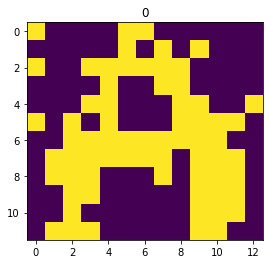

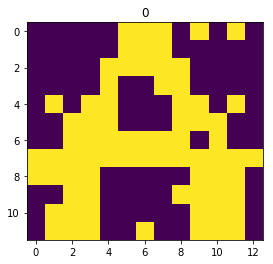

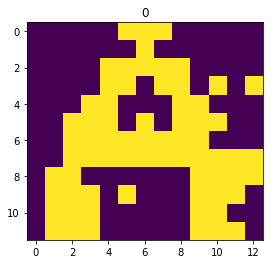

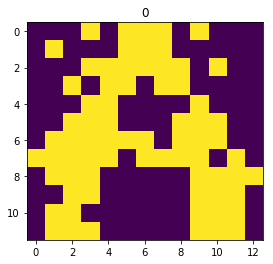

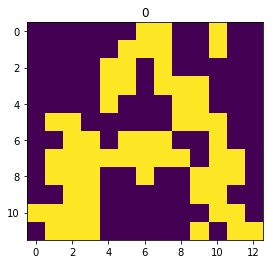

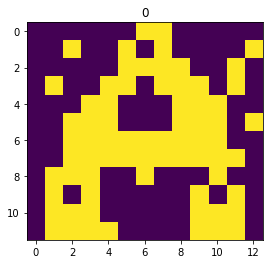

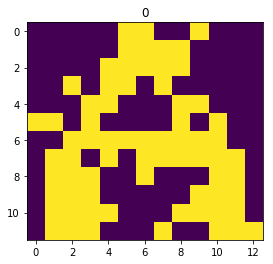

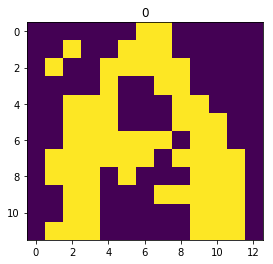

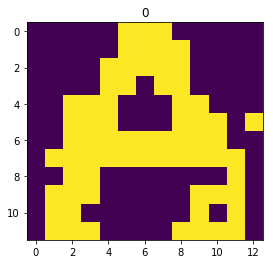

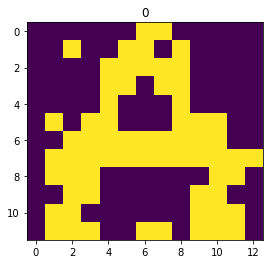

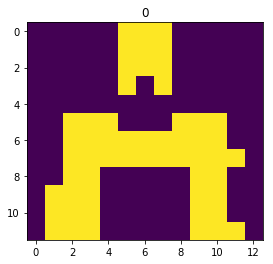

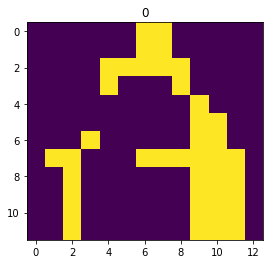

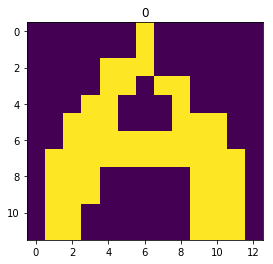

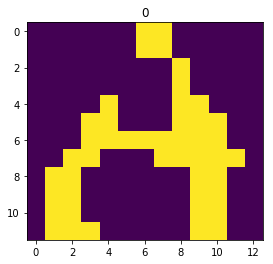

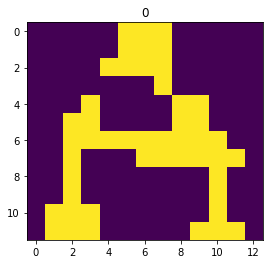

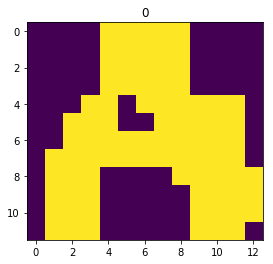

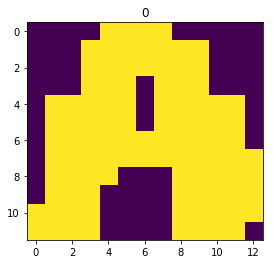

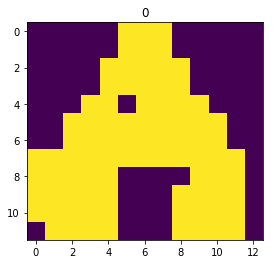

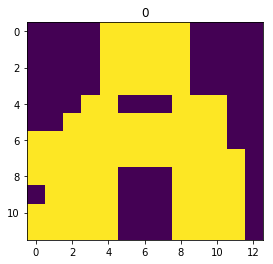

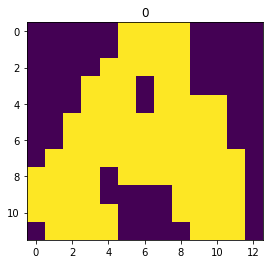

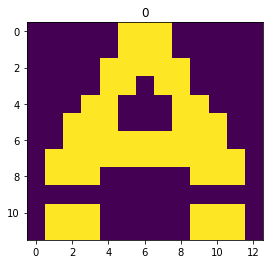

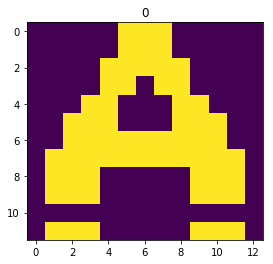

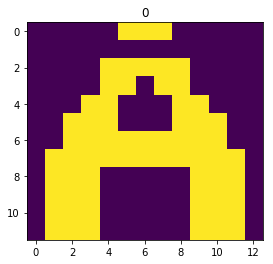

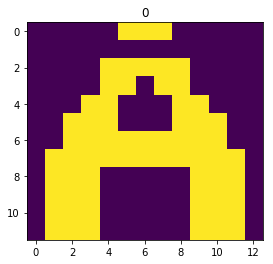

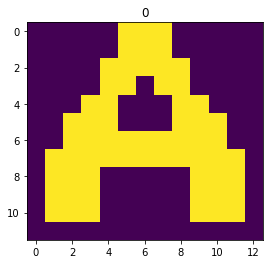

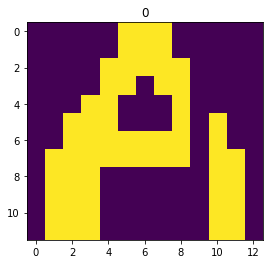

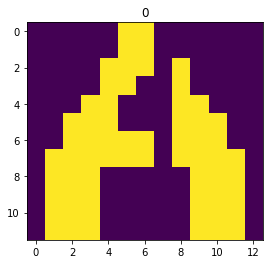

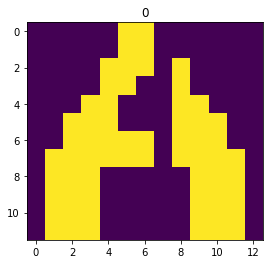

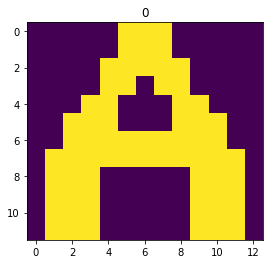

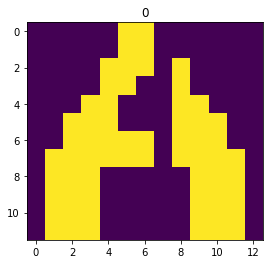

In [9]:
# check some noisy images
for i in range(30):#780):    
    plt.imshow(noisyLetters[i])
    plt.title(noisyLettersLabels[i])
    plt.show()

In [10]:
# build new model
inputs = layers.Input(shape=(156,))
x = layers.Dense(128, activation='relu')(inputs)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(128, activation='relu')(x)
outputs = layers.Dense(26, activation='softmax')(x)
model = models.Model(inputs=inputs, outputs=outputs)
model.compile(loss='categorical_crossentropy', 
              optimizer='Nadam',
              metrics=['accuracy'])
# get in data
x_data = np.array(noisyLetters.reshape(780, 156))
y_data = np.array(utils.to_categorical(
                noisyLettersLabels, num_classes=26))

# shuffle
rstate = np.random.get_state()
np.random.shuffle(x_data)
np.random.set_state(rstate)
np.random.shuffle(y_data)

# put into train and test
x_train, x_val, x_test = x_data[:500, :], x_data[500:650, :], x_data[650:, :]
y_train, y_val, y_test = y_data[:500], y_data[500:650], y_data[650:]

In [11]:
mlp = model.fit(x_train, y_train, epochs=20, 
                validation_data=(x_val, y_val))

Train on 500 samples, validate on 150 samples
Epoch 1/20
500/500 [==============================] - 0s 722us/step - loss: 2.7684 - acc: 0.2300 - val_loss: 1.7641 - val_acc: 0.4867
Epoch 2/20
500/500 [==============================] - 0s 72us/step - loss: 0.9989 - acc: 0.7200 - val_loss: 0.3585 - val_acc: 0.9267
Epoch 3/20
500/500 [==============================] - 0s 71us/step - loss: 0.2292 - acc: 0.9560 - val_loss: 0.2317 - val_acc: 0.9400
Epoch 4/20
500/500 [==============================] - 0s 72us/step - loss: 0.0896 - acc: 0.9720 - val_loss: 0.0894 - val_acc: 0.9733
Epoch 5/20
500/500 [==============================] - 0s 72us/step - loss: 0.3360 - acc: 0.9180 - val_loss: 0.4665 - val_acc: 0.8867
Epoch 6/20
500/500 [==============================] - 0s 70us/step - loss: 0.0975 - acc: 0.9840 - val_loss: 0.0777 - val_acc: 0.9800
Epoch 7/20
500/500 [==============================] - 0s 64us/step - loss: 0.0155 - acc: 0.9980 - val_loss: 0.0727 - val_acc: 0.9867
Epoch 8/20
500/500 [==

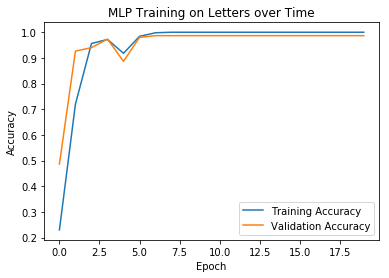

In [12]:
plt.plot(mlp.history['acc'])
plt.plot(mlp.history['val_acc'])
plt.legend(['Training Accuracy','Validation Accuracy'])
plt.title('MLP Training on Letters over Time')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [13]:
# check on test set
model.evaluate(x_test, y_test)

130/130 [==============================] - 0s 40us/step


[0.028922972398308607, 0.98461538461538467]

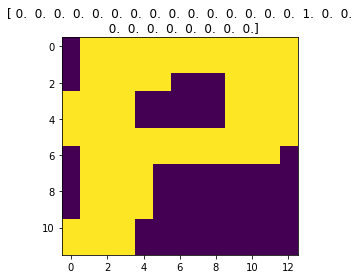

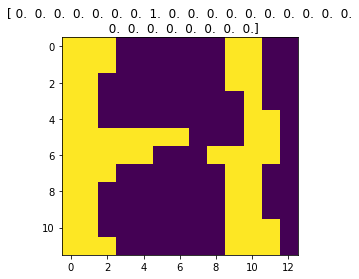

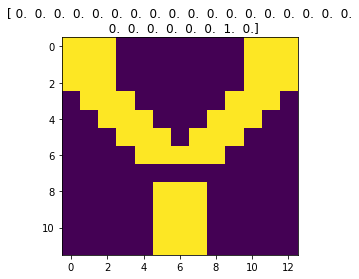

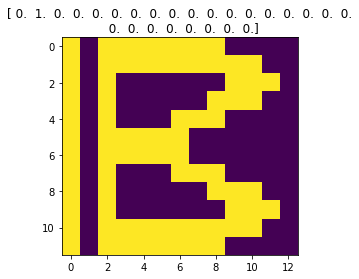

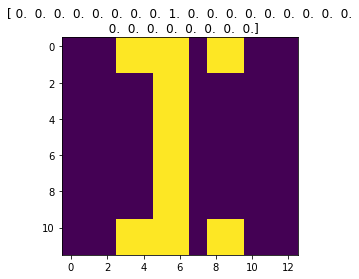

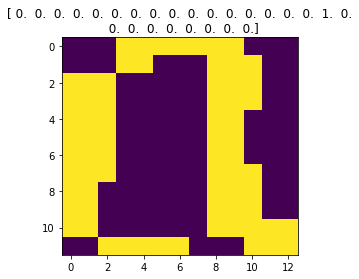

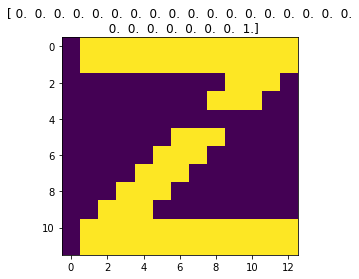

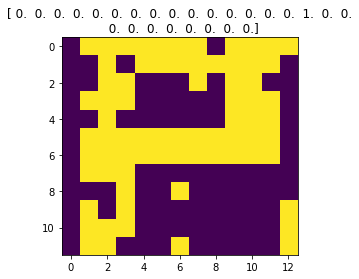

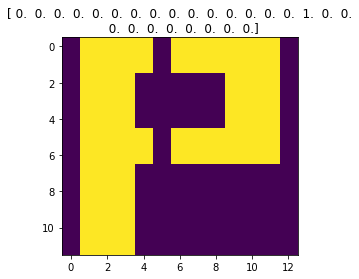

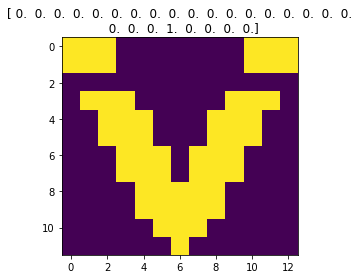

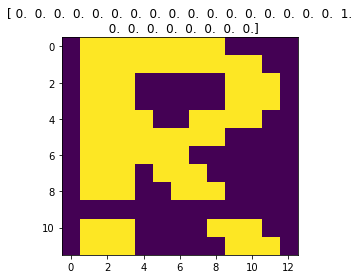

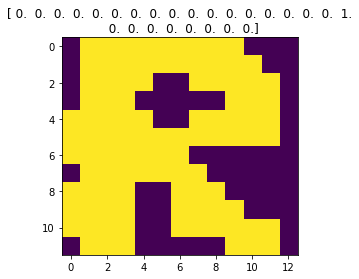

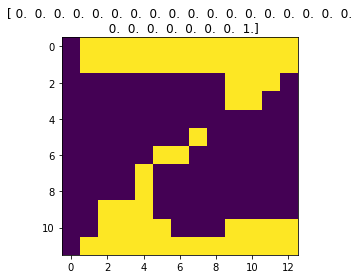

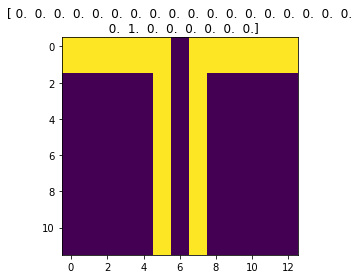

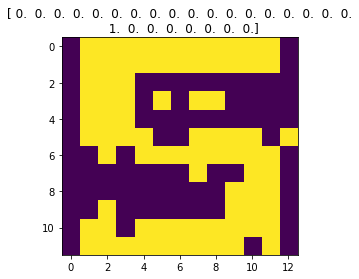

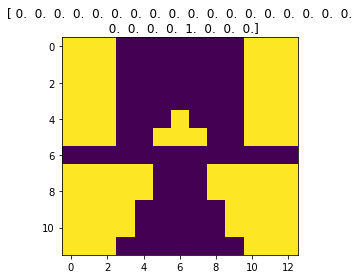

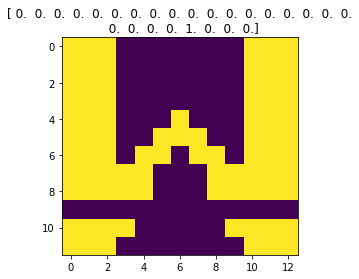

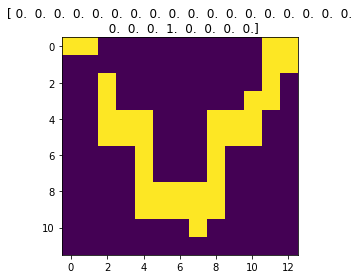

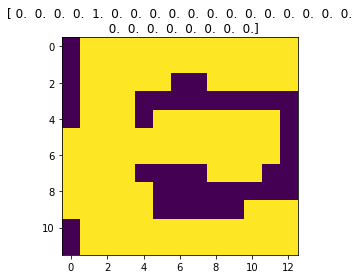

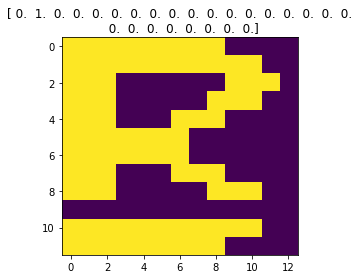

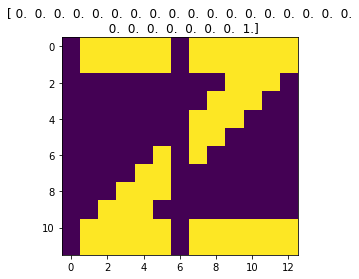

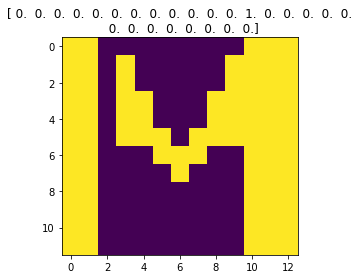

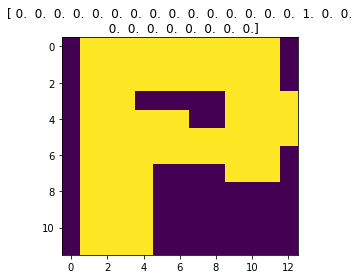

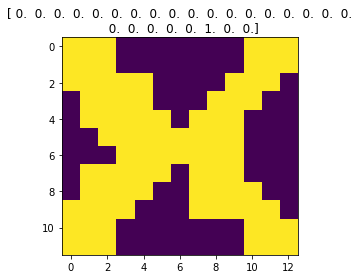

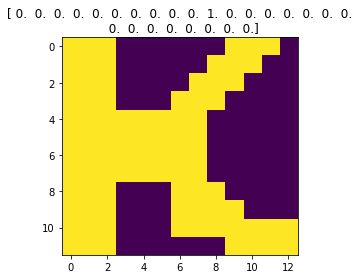

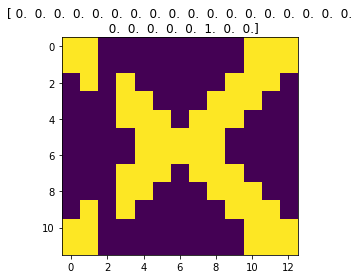

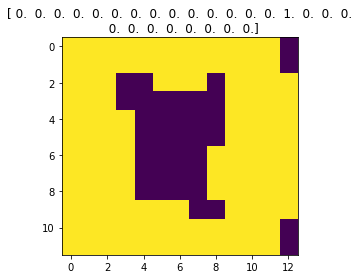

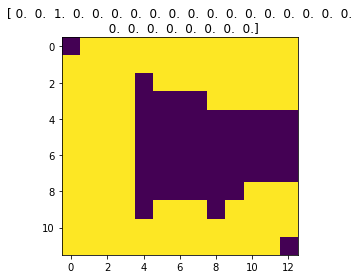

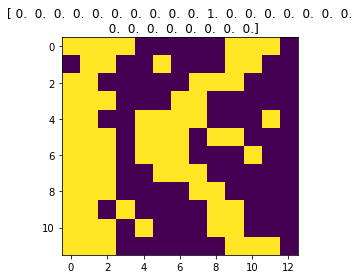

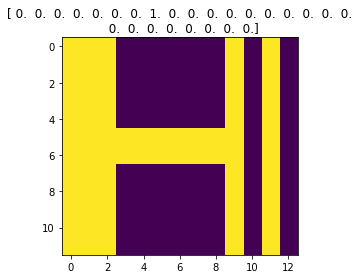

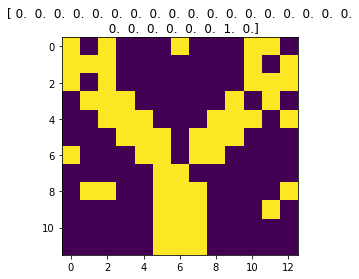

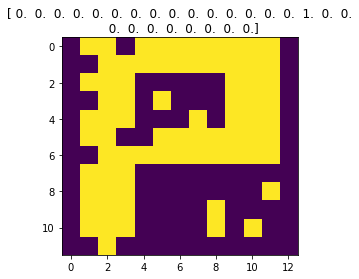

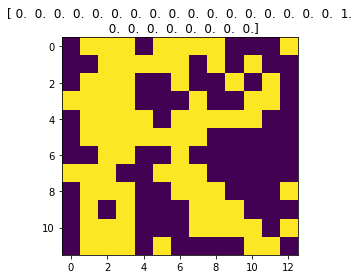

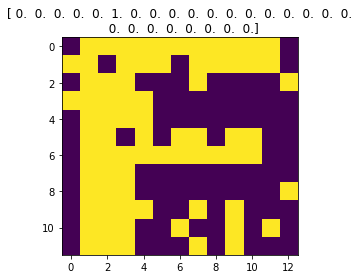

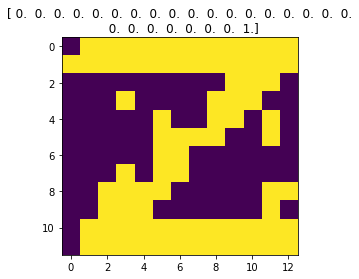

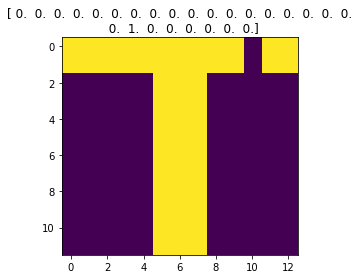

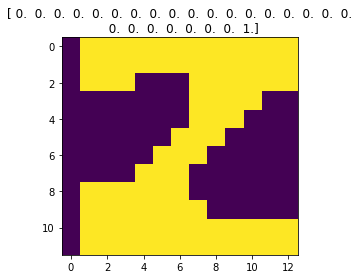

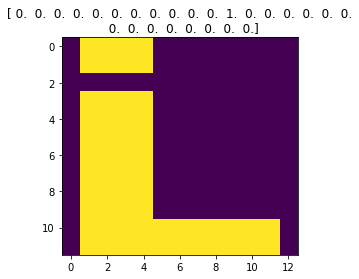

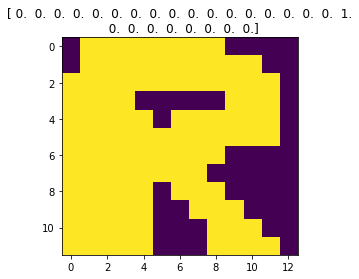

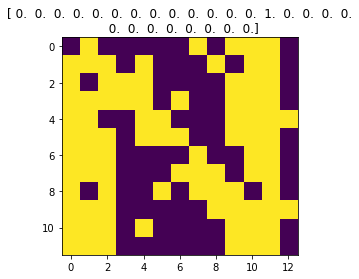

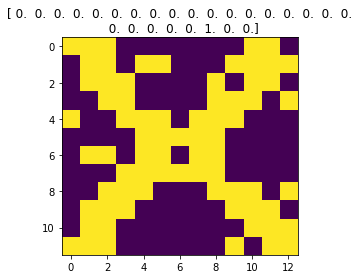

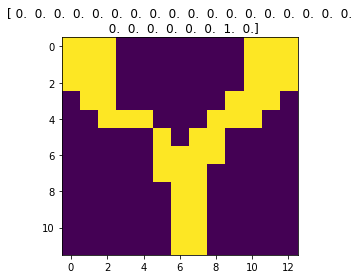

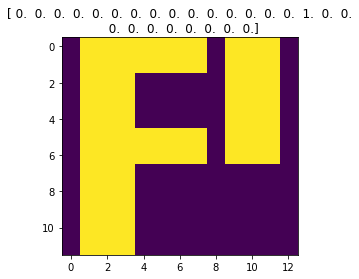

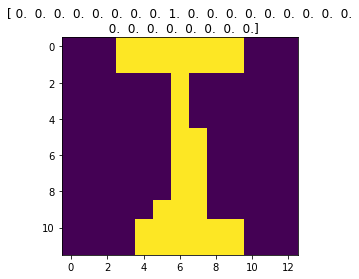

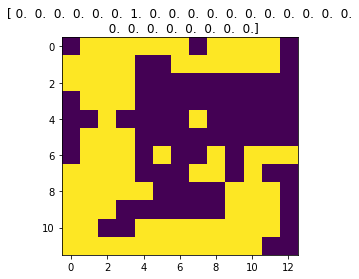

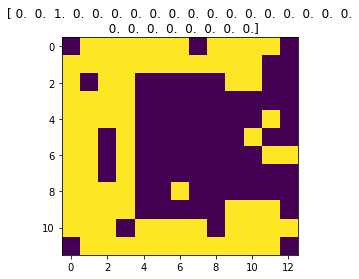

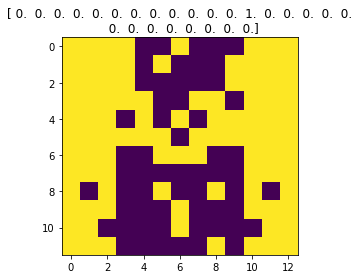

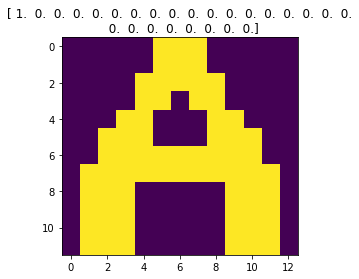

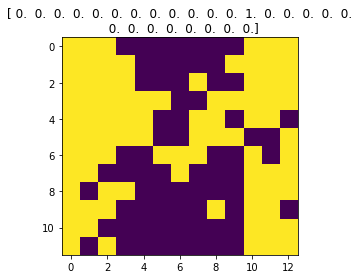

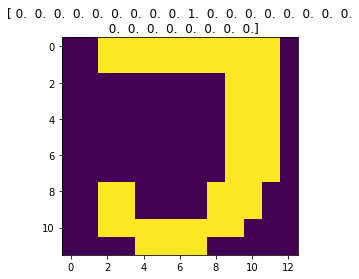

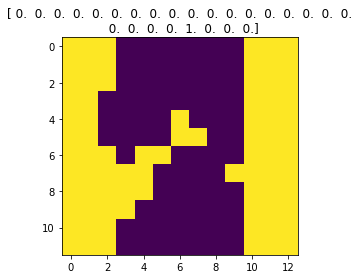

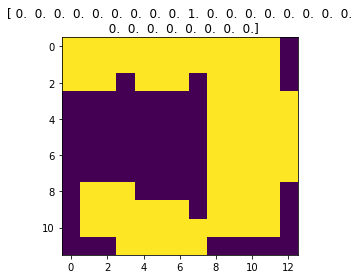

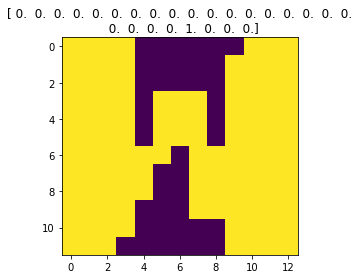

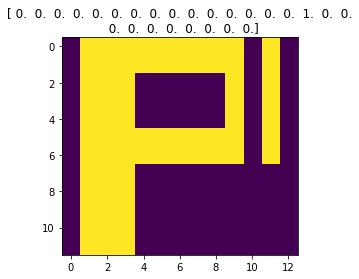

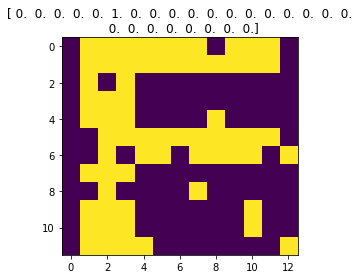

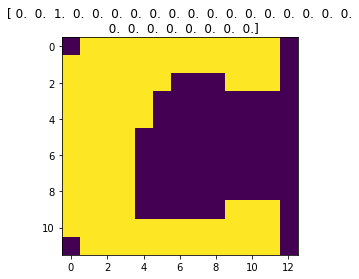

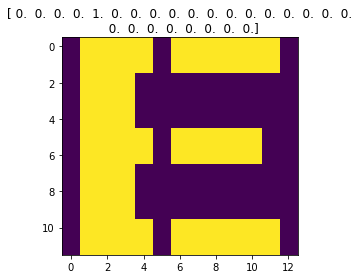

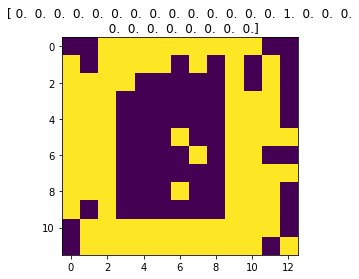

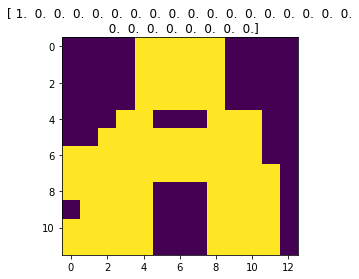

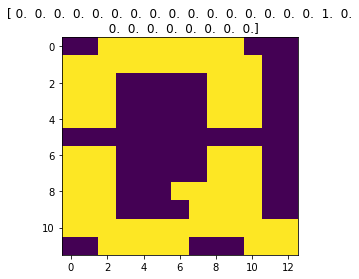

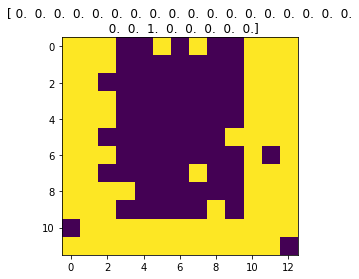

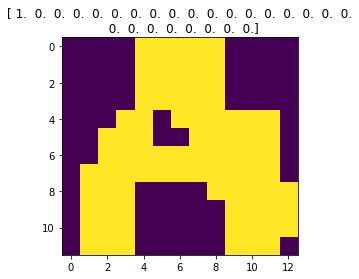

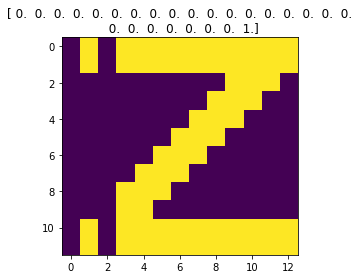

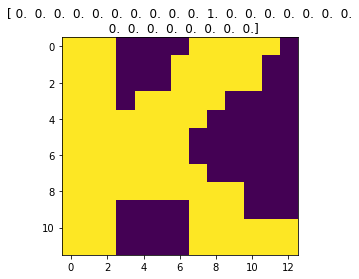

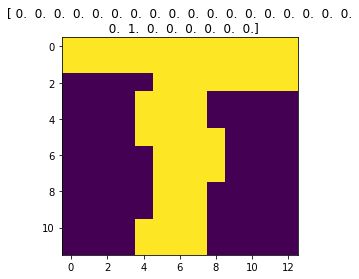

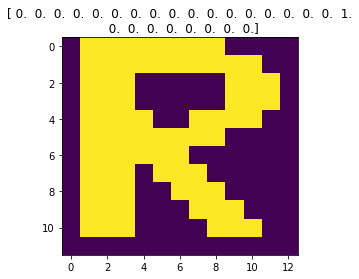

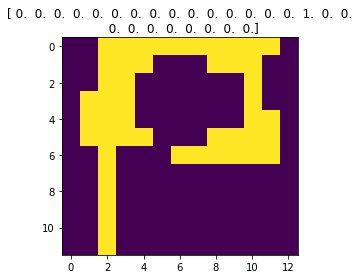

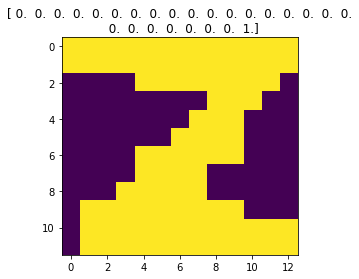

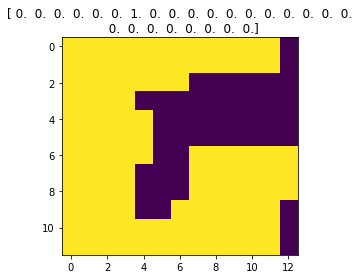

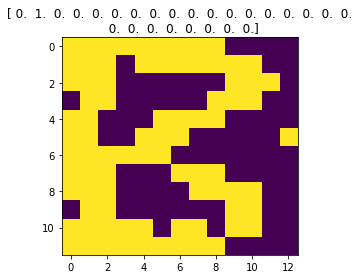

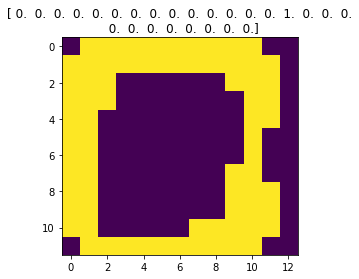

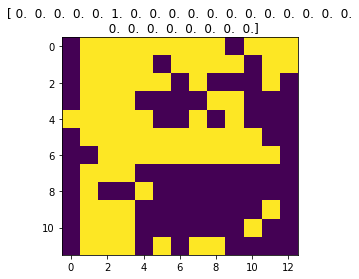

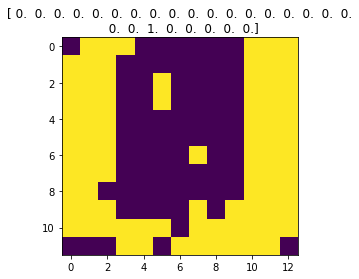

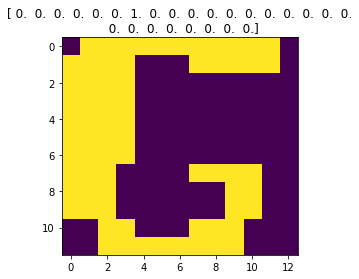

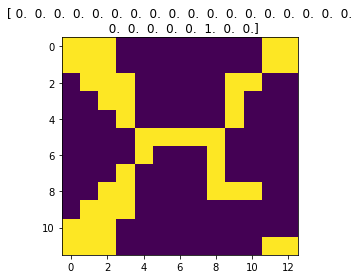

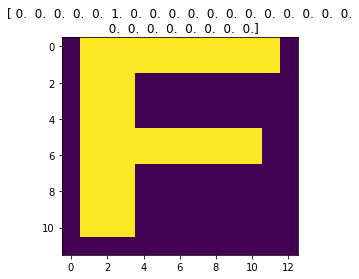

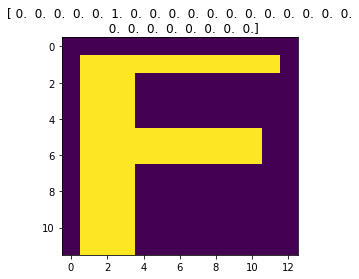

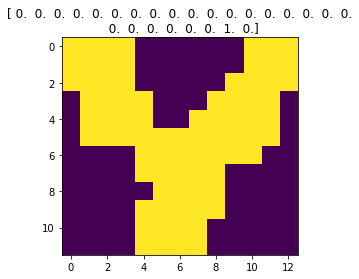

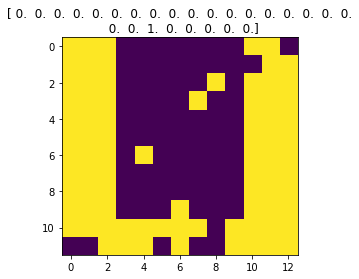

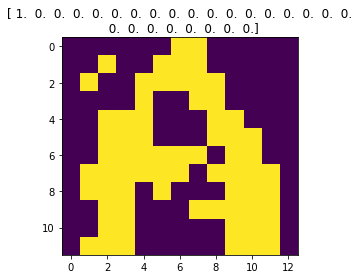

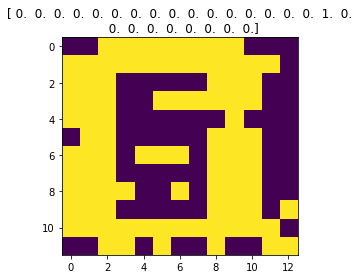

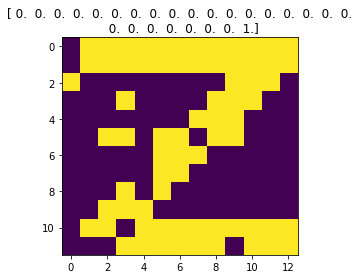

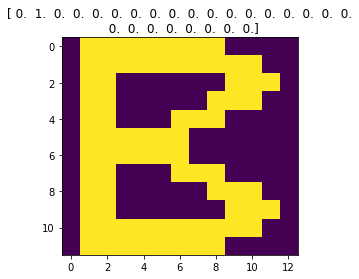

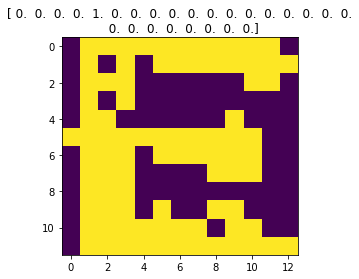

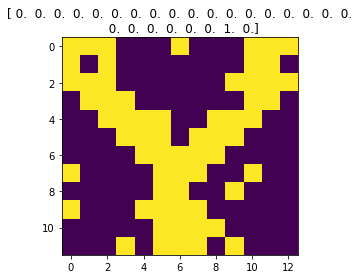

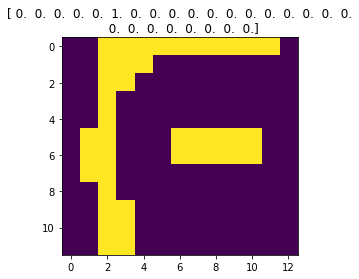

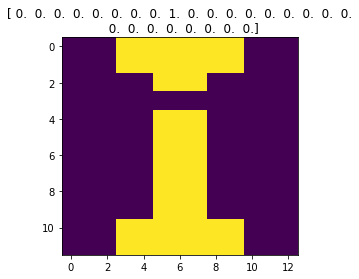

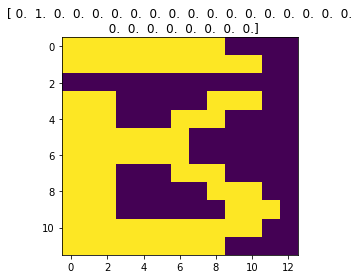

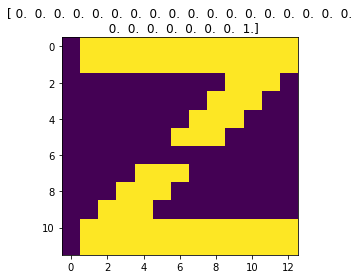

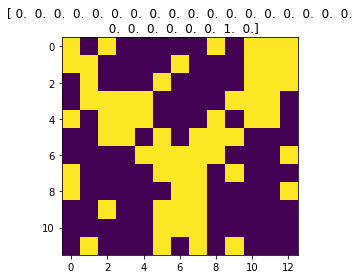

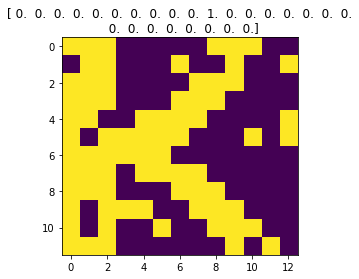

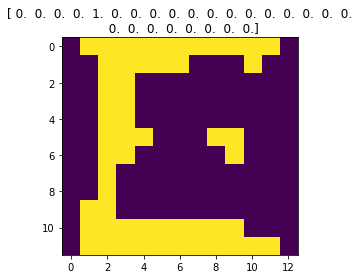

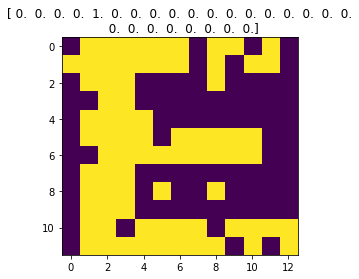

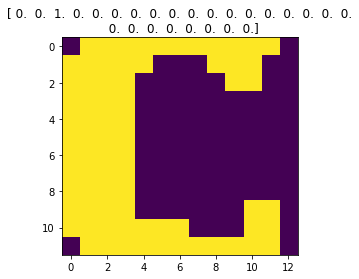

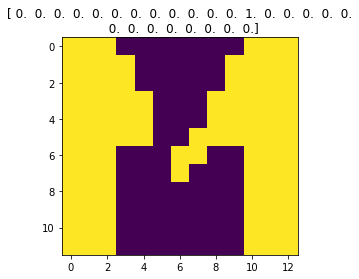

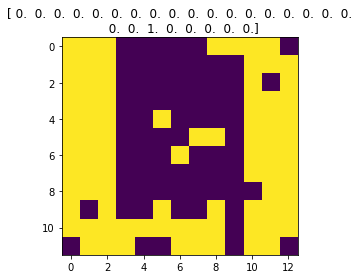

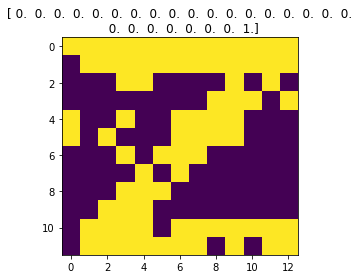

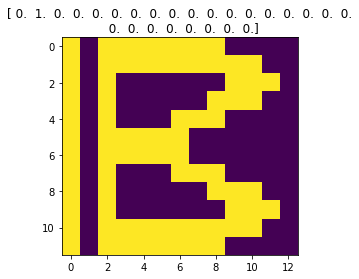

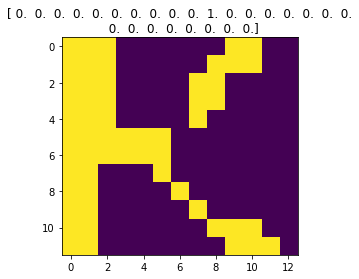

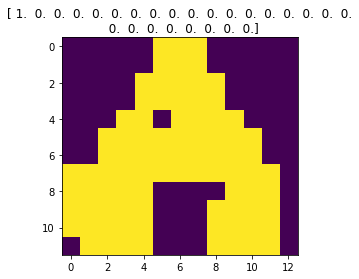

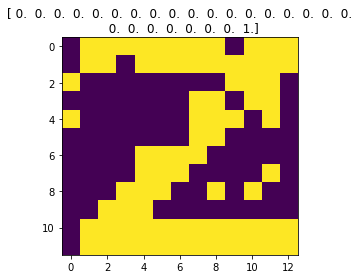

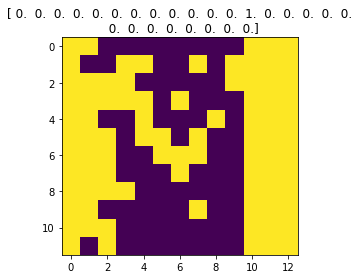

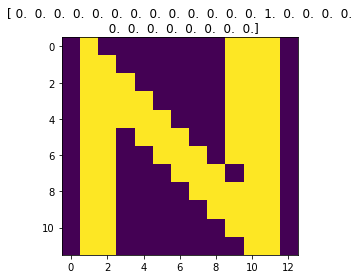

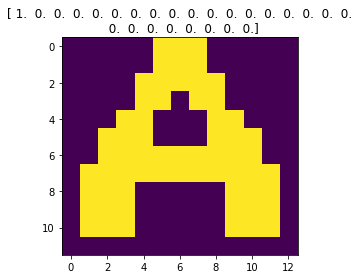

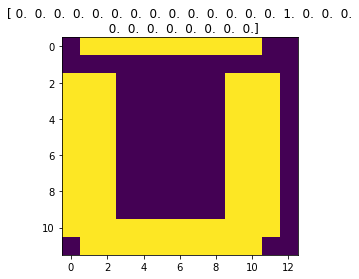

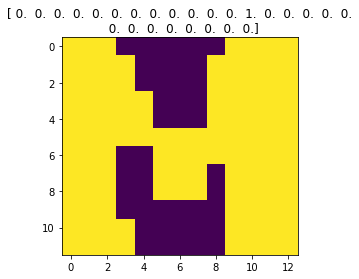

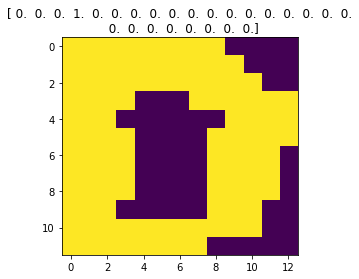

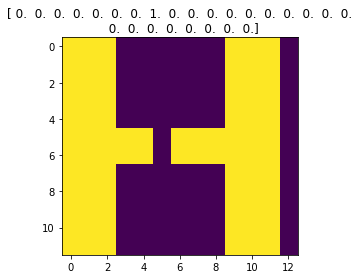

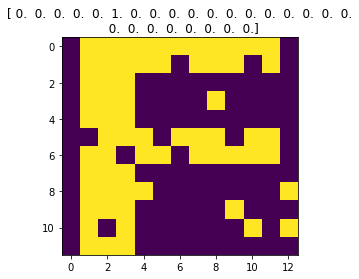

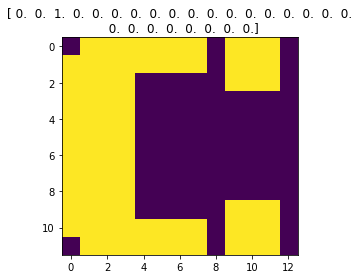

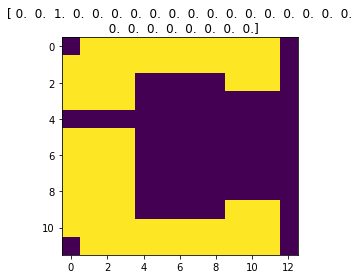

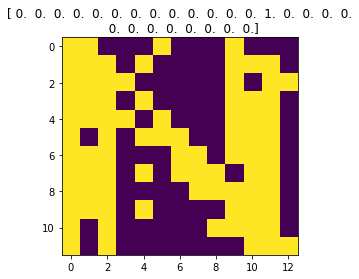

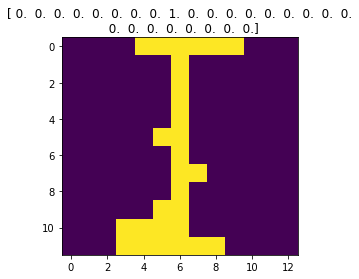

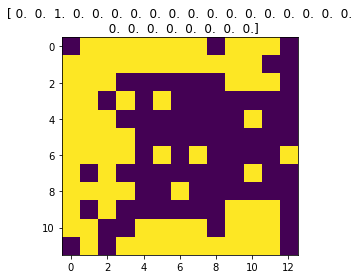

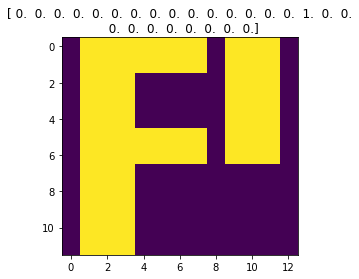

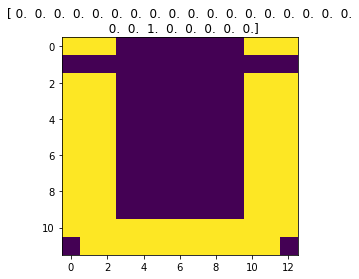

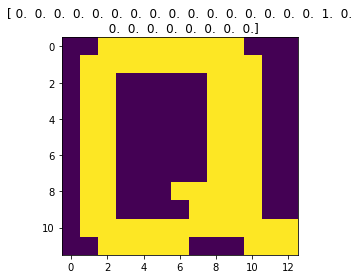

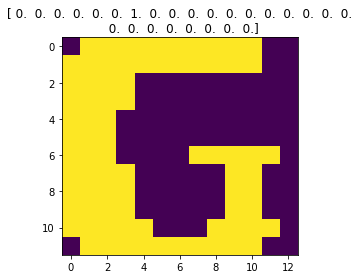

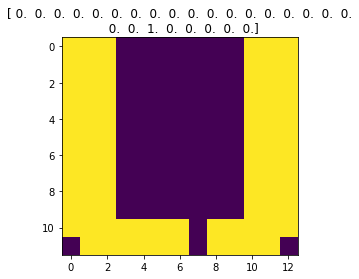

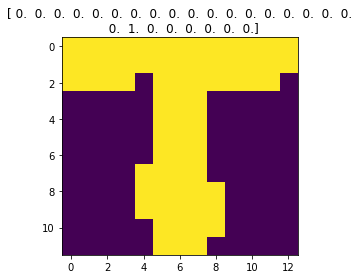

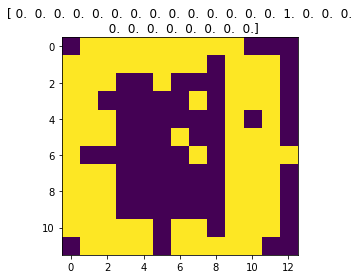

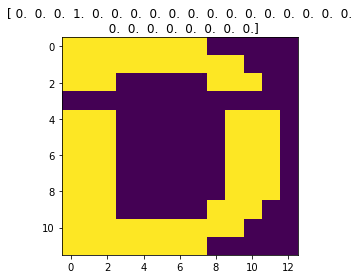

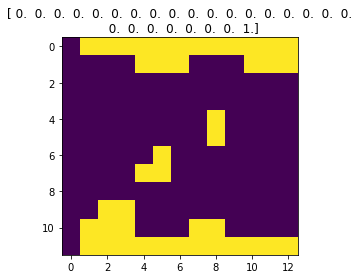

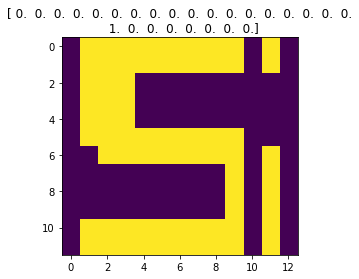

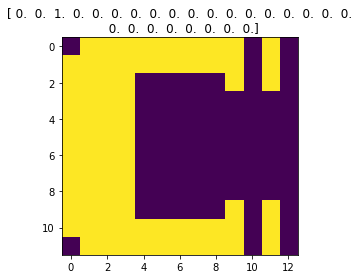

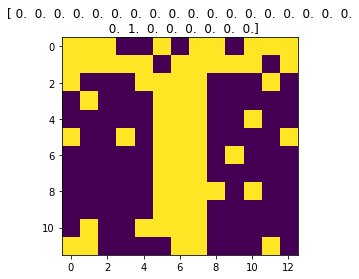

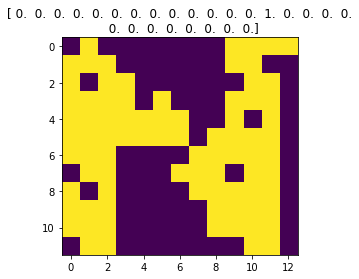

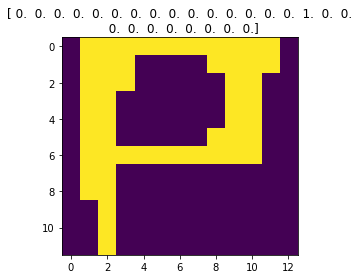

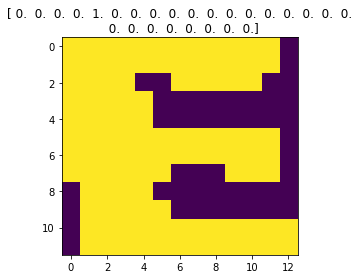

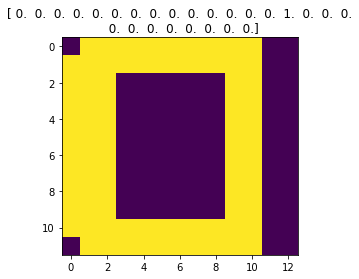

In [14]:
# see what test set looks like
for i in range(len(x_test)):
    plt.imshow(np.reshape(x_test[i], (12,13)))
    plt.title(y_test[i])
    plt.show()

## Unknown Letter

In [15]:
# get in the mystery letter
data = np.genfromtxt('pattern2.txt', delimiter='  ', dtype=None)
print(data)
mysteryLetter = np.array(data)
print(mysteryLetter.shape)

[[ 0.  0.  1.  0.  0.  1.  0.  0.  0.  1.  1.  1.  1.]
 [ 1.  1.  1.  0.  0.  1.  0.  0.  0.  1.  1.  1.  0.]
 [ 0.  0.  1.  0.  0.  1.  0.  1.  1.  1.  0.  0.  0.]
 [ 1.  1.  0.  0.  0.  0.  1.  0.  1.  0.  1.  0.  0.]
 [ 1.  1.  1.  0.  0.  1.  1.  1.  0.  1.  1.  0.  1.]
 [ 0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 1.  1.  1.  1.  1.  1.  1.  0.  1.  0.  0.  0.  0.]
 [ 1.  0.  1.  0.  1.  1.  1.  1.  1.  1.  1.  0.  1.]
 [ 1.  1.  1.  1.  1.  0.  1.  1.  1.  0.  1.  0.  0.]
 [ 1.  1.  1.  0.  0.  0.  0.  1.  0.  1.  0.  0.  0.]
 [ 1.  0.  1.  1.  0.  1.  1.  0.  0.  1.  0.  1.  0.]
 [ 1.  1.  0.  0.  0.  0.  0.  1.  0.  1.  0.  1.  1.]]
(12, 13)


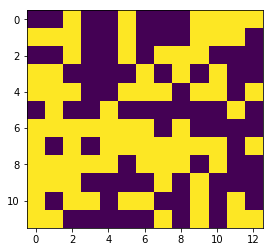

In [16]:
plt.imshow(mysteryLetter)
plt.show()
# wtf is this

In [17]:
chr(mlp.model.predict(np.reshape(mysteryLetter, (1,156))).argmax(axis=-1)[0]+65)
# we could not figure out how to directly output the letter from the
# keras model so we just use: 
# chr(prediction.argmax(axis=-1)[0]+65 as out method

# it is apparently a 'K'.

'K'

## Comparison of Hidden Layer Configurations

Train on 500 samples, validate on 150 samples
Epoch 1/20
500/500 [==============================] - 0s 504us/step - loss: 3.1205 - acc: 0.1740 - val_loss: 2.8363 - val_acc: 0.2200
Epoch 2/20
500/500 [==============================] - 0s 39us/step - loss: 2.2879 - acc: 0.4700 - val_loss: 2.0622 - val_acc: 0.5600
Epoch 3/20
500/500 [==============================] - 0s 41us/step - loss: 1.6081 - acc: 0.7980 - val_loss: 1.4986 - val_acc: 0.8067
Epoch 4/20
500/500 [==============================] - 0s 59us/step - loss: 1.1330 - acc: 0.9160 - val_loss: 1.1124 - val_acc: 0.8800
Epoch 5/20
500/500 [==============================] - 0s 41us/step - loss: 0.8250 - acc: 0.9680 - val_loss: 0.8595 - val_acc: 0.9333
Epoch 6/20
500/500 [==============================] - 0s 42us/step - loss: 0.6244 - acc: 0.9860 - val_loss: 0.6929 - val_acc: 0.9400
Epoch 7/20
500/500 [==============================] - 0s 36us/step - loss: 0.4914 - acc: 0.9940 - val_loss: 0.5781 - val_acc: 0.9667
Epoch 8/20
500/500 [==

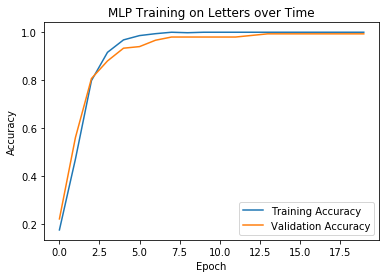

In [18]:
# now to test different hidden node congigurations
# no hidden layers
inputs = layers.Input(shape=(156,))
outputs = layers.Dense(26, activation='softmax')(inputs)
model = models.Model(inputs=inputs, outputs=outputs)
model.compile(loss='categorical_crossentropy', 
              optimizer='Nadam',
              metrics=['accuracy'])

mlp = model.fit(x_train, y_train, epochs=20, 
                validation_data=(x_val, y_val))

plt.plot(mlp.history['acc'])
plt.plot(mlp.history['val_acc'])
plt.legend(['Training Accuracy','Validation Accuracy'])
plt.title('MLP Training on Letters over Time')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

Train on 500 samples, validate on 150 samples
Epoch 1/20
500/500 [==============================] - 0s 612us/step - loss: 2.7010 - acc: 0.3340 - val_loss: 1.9724 - val_acc: 0.6067
Epoch 2/20
500/500 [==============================] - 0s 54us/step - loss: 1.2661 - acc: 0.8120 - val_loss: 0.8943 - val_acc: 0.8067
Epoch 3/20
500/500 [==============================] - 0s 53us/step - loss: 0.4961 - acc: 0.9580 - val_loss: 0.3879 - val_acc: 0.9800
Epoch 4/20
500/500 [==============================] - 0s 51us/step - loss: 0.2333 - acc: 0.9920 - val_loss: 0.2438 - val_acc: 0.9933
Epoch 5/20
500/500 [==============================] - 0s 54us/step - loss: 0.1342 - acc: 0.9980 - val_loss: 0.1824 - val_acc: 0.9867
Epoch 6/20
500/500 [==============================] - 0s 44us/step - loss: 0.0919 - acc: 1.0000 - val_loss: 0.1332 - val_acc: 0.9933
Epoch 7/20
500/500 [==============================] - 0s 52us/step - loss: 0.0657 - acc: 1.0000 - val_loss: 0.1100 - val_acc: 1.0000
Epoch 8/20
500/500 [==

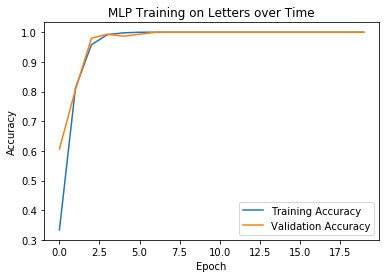

In [19]:
# 1 hidden layer 128 nodes
inputs = layers.Input(shape=(156,))
x = layers.Dense(128, activation='relu')(inputs)
outputs = layers.Dense(26, activation='softmax')(x)
model = models.Model(inputs=inputs, outputs=outputs)
model.compile(loss='categorical_crossentropy', 
              optimizer='Nadam',
              metrics=['accuracy'])

mlp = model.fit(x_train, y_train, epochs=20, 
                validation_data=(x_val, y_val))

plt.plot(mlp.history['acc'])
plt.plot(mlp.history['val_acc'])
plt.legend(['Training Accuracy','Validation Accuracy'])
plt.title('MLP Training on Letters over Time')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

Train on 500 samples, validate on 150 samples
Epoch 1/20
500/500 [==============================] - 0s 738us/step - loss: 3.2293 - acc: 0.0440 - val_loss: 3.1553 - val_acc: 0.0733
Epoch 2/20
500/500 [==============================] - 0s 40us/step - loss: 3.0322 - acc: 0.1260 - val_loss: 2.9795 - val_acc: 0.1267
Epoch 3/20
500/500 [==============================] - 0s 44us/step - loss: 2.8014 - acc: 0.2240 - val_loss: 2.7504 - val_acc: 0.2400
Epoch 4/20
500/500 [==============================] - 0s 58us/step - loss: 2.5271 - acc: 0.3260 - val_loss: 2.5016 - val_acc: 0.3067
Epoch 5/20
500/500 [==============================] - 0s 51us/step - loss: 2.2314 - acc: 0.4000 - val_loss: 2.2402 - val_acc: 0.4133
Epoch 6/20
500/500 [==============================] - 0s 57us/step - loss: 1.9314 - acc: 0.4940 - val_loss: 1.9700 - val_acc: 0.4667
Epoch 7/20
500/500 [==============================] - 0s 51us/step - loss: 1.6473 - acc: 0.6160 - val_loss: 1.7159 - val_acc: 0.5400
Epoch 8/20
500/500 [==

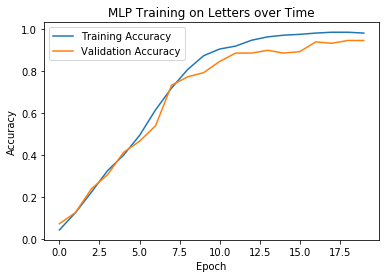

In [20]:
# 1 hidden layer 10 nodes
inputs = layers.Input(shape=(156,))
x = layers.Dense(10, activation='relu')(inputs)
outputs = layers.Dense(26, activation='softmax')(x)
model = models.Model(inputs=inputs, outputs=outputs)
model.compile(loss='categorical_crossentropy', 
              optimizer='Nadam',
              metrics=['accuracy'])

mlp = model.fit(x_train, y_train, epochs=20, 
                validation_data=(x_val, y_val))

plt.plot(mlp.history['acc'])
plt.plot(mlp.history['val_acc'])
plt.legend(['Training Accuracy','Validation Accuracy'])
plt.title('MLP Training on Letters over Time')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

Train on 500 samples, validate on 150 samples
Epoch 1/20
500/500 [==============================] - 0s 682us/step - loss: 2.6910 - acc: 0.3540 - val_loss: 1.9164 - val_acc: 0.6733
Epoch 2/20
500/500 [==============================] - 0s 42us/step - loss: 1.1842 - acc: 0.8540 - val_loss: 0.7732 - val_acc: 0.9067
Epoch 3/20
500/500 [==============================] - 0s 63us/step - loss: 0.4302 - acc: 0.9780 - val_loss: 0.3785 - val_acc: 0.9600
Epoch 4/20
500/500 [==============================] - 0s 53us/step - loss: 0.1987 - acc: 0.9920 - val_loss: 0.2016 - val_acc: 0.9867
Epoch 5/20
500/500 [==============================] - 0s 48us/step - loss: 0.1108 - acc: 0.9980 - val_loss: 0.1516 - val_acc: 0.9933
Epoch 6/20
500/500 [==============================] - 0s 50us/step - loss: 0.0745 - acc: 1.0000 - val_loss: 0.1231 - val_acc: 0.9933
Epoch 7/20
500/500 [==============================] - 0s 71us/step - loss: 0.0539 - acc: 1.0000 - val_loss: 0.0994 - val_acc: 0.9933
Epoch 8/20
500/500 [==

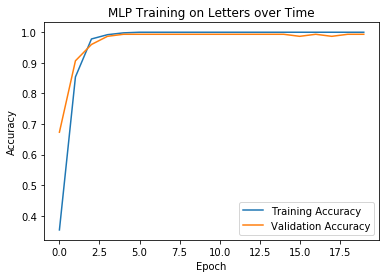

In [21]:
# 1 hidden layer 156 nodes
inputs = layers.Input(shape=(156,))
x = layers.Dense(156, activation='relu')(inputs)
outputs = layers.Dense(26, activation='softmax')(x)
model = models.Model(inputs=inputs, outputs=outputs)
model.compile(loss='categorical_crossentropy', 
              optimizer='Nadam',
              metrics=['accuracy'])

mlp = model.fit(x_train, y_train, epochs=20, 
                validation_data=(x_val, y_val))

plt.plot(mlp.history['acc'])
plt.plot(mlp.history['val_acc'])
plt.legend(['Training Accuracy','Validation Accuracy'])
plt.title('MLP Training on Letters over Time')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

Train on 500 samples, validate on 150 samples
Epoch 1/20
500/500 [==============================] - 0s 774us/step - loss: 2.3313 - acc: 0.4800 - val_loss: 1.2880 - val_acc: 0.8333
Epoch 2/20
500/500 [==============================] - 0s 62us/step - loss: 0.6326 - acc: 0.9520 - val_loss: 0.4108 - val_acc: 0.9800
Epoch 3/20
500/500 [==============================] - 0s 82us/step - loss: 0.1962 - acc: 0.9940 - val_loss: 0.2219 - val_acc: 0.9867
Epoch 4/20
500/500 [==============================] - 0s 63us/step - loss: 0.0974 - acc: 0.9940 - val_loss: 0.1339 - val_acc: 0.9933
Epoch 5/20
500/500 [==============================] - 0s 83us/step - loss: 0.0580 - acc: 1.0000 - val_loss: 0.1053 - val_acc: 0.9933
Epoch 6/20
500/500 [==============================] - 0s 58us/step - loss: 0.0412 - acc: 1.0000 - val_loss: 0.0850 - val_acc: 0.9933
Epoch 7/20
500/500 [==============================] - 0s 59us/step - loss: 0.0298 - acc: 1.0000 - val_loss: 0.0689 - val_acc: 0.9933
Epoch 8/20
500/500 [==

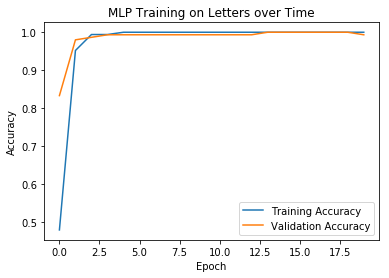

In [22]:
# 1 hidden layer 300 nodes
inputs = layers.Input(shape=(156,))
x = layers.Dense(300, activation='relu')(inputs)
outputs = layers.Dense(26, activation='softmax')(x)
model = models.Model(inputs=inputs, outputs=outputs)
model.compile(loss='categorical_crossentropy', 
              optimizer='Nadam',
              metrics=['accuracy'])

mlp = model.fit(x_train, y_train, epochs=20, 
                validation_data=(x_val, y_val))

plt.plot(mlp.history['acc'])
plt.plot(mlp.history['val_acc'])
plt.legend(['Training Accuracy','Validation Accuracy'])
plt.title('MLP Training on Letters over Time')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

Fewer nodes in the hidden layer makes it take more epochs to converge, though I feel that this is problem specific and not general. Something interesting is that a hidden layer with 10 nodes performed worse than no hidden layer at all, some bottle-necking going on here.

# Edge Detection

In [14]:
# also requires PIL
from scipy import misc
image = misc.imread('image.jpg')
print(image.shape)

(125, 125, 3)


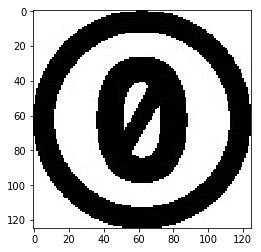

In [15]:
import matplotlib.pyplot as plt
plt.imshow(image)

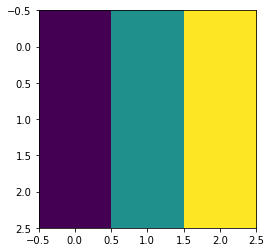

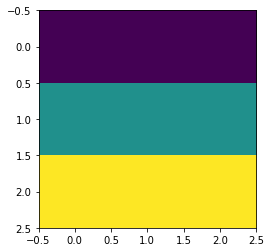

In [16]:
# create a vertical and horizontal filter
edgeFilterV = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
edgeFilterH = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])
plt.imshow(edgeFilterV)
plt.show()
plt.imshow(edgeFilterH)
plt.show()

In [17]:
# add padding to image, so output can be same sized
padImg = np.pad(image, ((1,1),(1,1),(0,0)), 'constant')
print(padImg.shape)

(127, 127, 3)


In [18]:
# do convolutions with each filter

vertOut = np.empty(shape=(image.shape[0], image.shape[1]))
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        vertOut[i][j] = (np.sum(edgeFilterV*padImg[i:i+3, j:j+3, 0])
                         + np.sum(edgeFilterV*padImg[i:i+3, j:j+3, 1])
                         + np.sum(edgeFilterV*padImg[i:i+3, j:j+3, 2]))

horOut = np.empty(shape=(image.shape[0], image.shape[1]))
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        horOut[i][j] = (np.sum(edgeFilterH*padImg[i:i+3, j:j+3, 0])
                         + np.sum(edgeFilterH*padImg[i:i+3, j:j+3, 1])
                         + np.sum(edgeFilterH*padImg[i:i+3, j:j+3, 2]))

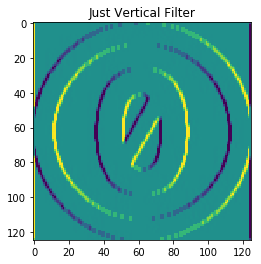

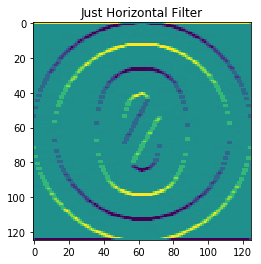

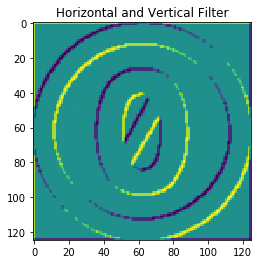

In [19]:
# show the results
plt.imshow(vertOut)
plt.title('Just Vertical Filter')
plt.show()
plt.imshow(horOut)
plt.title('Just Horizontal Filter')
plt.show()
plt.title('Horizontal and Vertical Filter')
plt.imshow(vertOut+horOut)
plt.show()

In [29]:
"""misc.imsave('conv3vert.jpg', vertOut)
misc.imsave('conv3hor.jpg', horOut)
misc.imsave('conv3combined.jpg', vertOut + horOut)"""

"misc.imsave('conv3vert.jpg', vertOut)\nmisc.imsave('conv3hor.jpg', horOut)\nmisc.imsave('conv3combined.jpg', vertOut + horOut)"

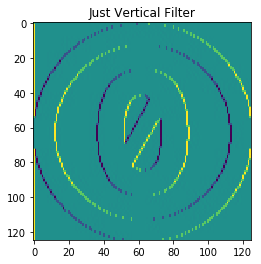

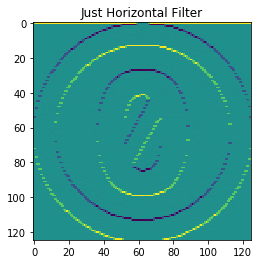

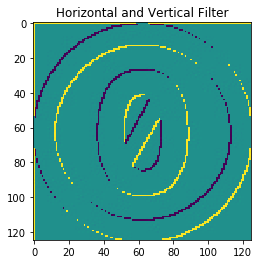

In [20]:
# try doing all the same process, but smaller filter
edgeFilterV = np.array([[-1,1],[-1,1]])
edgeFilterH = np.array([[-1,-1],[1,1]])

vertOut = np.empty(shape=(image.shape[0], image.shape[1]))
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        vertOut[i][j] = (np.sum(edgeFilterV*padImg[i:i+2, j:j+2, 0])
                         + np.sum(edgeFilterV*padImg[i:i+2, j:j+2, 1])
                         + np.sum(edgeFilterV*padImg[i:i+2, j:j+2, 2]))

horOut = np.empty(shape=(image.shape[0], image.shape[1]))
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        horOut[i][j] = (np.sum(edgeFilterH*padImg[i:i+2, j:j+2, 0])
                         + np.sum(edgeFilterH*padImg[i:i+2, j:j+2, 1])
                         + np.sum(edgeFilterH*padImg[i:i+2, j:j+2, 2]))
        
plt.imshow(vertOut)
plt.title('Just Vertical Filter')
plt.show()
plt.imshow(horOut)
plt.title('Just Horizontal Filter')
plt.show()
plt.title('Horizontal and Vertical Filter')
plt.imshow(vertOut+horOut)
plt.show()

In [31]:
"""misc.imsave('conv2vert.jpg', vertOut)
misc.imsave('conv2hor.jpg', horOut)
misc.imsave('conv2combined.jpg', vertOut + horOut)"""

"misc.imsave('conv2vert.jpg', vertOut)\nmisc.imsave('conv2hor.jpg', horOut)\nmisc.imsave('conv2combined.jpg', vertOut + horOut)"